In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/statcast_pitch_swing_data_20240402_20241030_with_arm_angle.csv")

In [3]:

player_avg_data = df.groupby('player_name').agg(
    avg_swing_length=('swing_length', 'mean'),
    avg_bat_speed=('bat_speed', 'mean'),
    woba_value=('woba_value', 'mean')
).reset_index()

In [4]:

player_avg_data

,player_name,avg_swing_length,avg_bat_speed,woba_value
0,"Abrams, CJ",7.389728,69.809306,0.322727
1,"Abreu, José",6.983051,71.169492,0.177670
2,"Abreu, Wilyer",7.313023,72.746356,0.340795
3,"Acuña Jr., Ronald",7.511453,74.649441,0.329803
4,"Acuña, Luisangel",7.187342,71.421519,0.376744
...,...,...,...,...
646,"Yorke, Nick",7.164000,70.154667,0.290476
647,"Yoshida, Masataka",7.212556,69.532586,0.348622
648,"Young, Jacob",6.467299,62.357464,0.299042
649,"Zavala, Seby",7.188000,65.936000,0.237500


In [5]:
# Create an imputer for filling NaN values with the mean
#Handling missing values
imputer = SimpleImputer(strategy='mean')

In [6]:
X = player_avg_data[['avg_swing_length', 'avg_bat_speed']]
X_imputed = imputer.fit_transform(X)

In [7]:
kmeans = KMeans(n_clusters=4, random_state=0)
player_avg_data['cluster'] = kmeans.fit_predict(X_imputed)

In [8]:
cluster_labels = {
    0: 'Average and Long',
    1: 'Fast and Long',
    2: 'Slow and Short',
    3: 'Average and Short'
}

player_avg_data['cluster_label'] = player_avg_data['cluster'].map(cluster_labels)

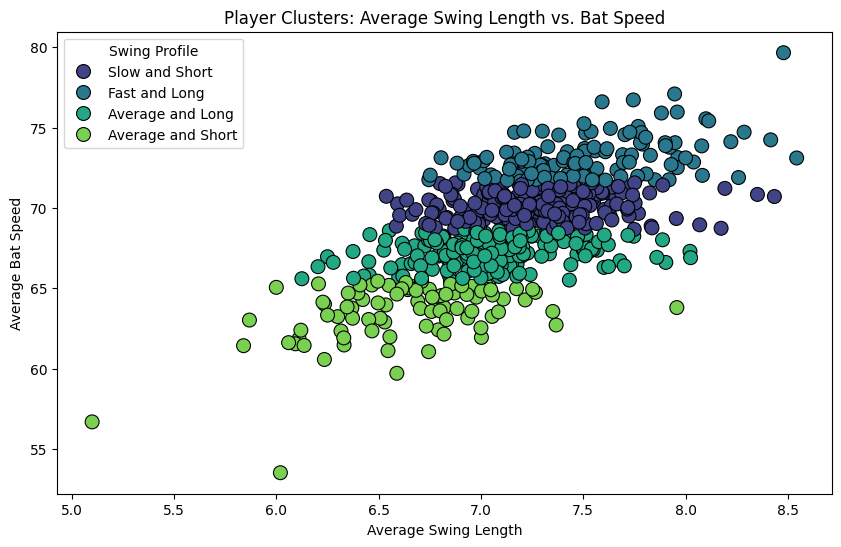

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=player_avg_data, x='avg_swing_length', y='avg_bat_speed', 
                hue='cluster_label', palette='viridis', s=100, edgecolor='k')

plt.xlabel('Average Swing Length')
plt.ylabel('Average Bat Speed')
plt.title('Player Clusters: Average Swing Length vs. Bat Speed')
plt.legend(title="Swing Profile")
plt.show()

In [10]:
# Normalize the values so they are on the same scale
scaler = StandardScaler()
player_avg_data[['avg_swing_length', 'avg_bat_speed', 'woba_value']] = scaler.fit_transform(
    player_avg_data[['avg_swing_length', 'avg_bat_speed', 'woba_value']]
)

In [11]:
# Step 1: Handling missing values (if any)
imputer = SimpleImputer(strategy='mean')

In [12]:
# Use the standardized data for clustering (avg_swing_length, avg_bat_speed are already scaled)
X = player_avg_data[['avg_swing_length', 'avg_bat_speed']]
X_imputed = imputer.fit_transform(X)

In [13]:
# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
player_avg_data['cluster'] = kmeans.fit_predict(X_imputed)

In [14]:
# Define cluster labels (same as before)
cluster_labels = {
    0: 'Average and Long',
    1: 'Fast and Long',
    2: 'Slow and Short',
    3: 'Average and Short'
}

In [15]:
# Map the cluster numbers to meaningful labels
player_avg_data['cluster_label'] = player_avg_data['cluster'].map(cluster_labels)


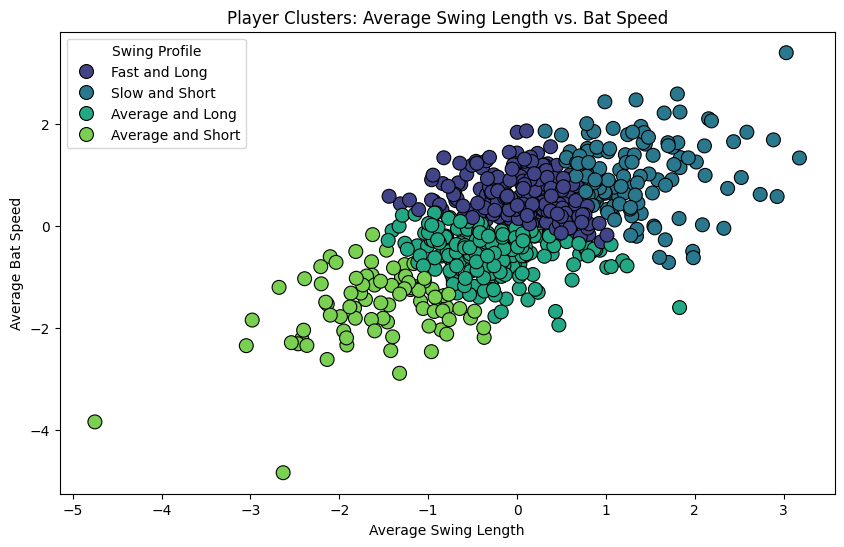

In [16]:
# Step 3: Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=player_avg_data, x='avg_swing_length', y='avg_bat_speed', 
                hue='cluster_label', palette='viridis', s=100, edgecolor='k')

plt.xlabel('Average Swing Length')
plt.ylabel('Average Bat Speed')
plt.title('Player Clusters: Average Swing Length vs. Bat Speed')
plt.legend(title="Swing Profile")
plt.show()